# <p style="font-family: Monaco; font-size: 1.4em; color: darkorange; font-weight: bold;">Bharat Intern</p>

# Task 1 : Stock Prediction
<p style="font-family: 'San Francisco', Arial, sans-serif; font-size: 1.3em; color: black; font-weight: bold;"> By - Saketh Yalamanchili</p>

# Stock Market

Stock Market is a place where buying and selling of shares happen for publicly listed companies. Stock exchange is the mediator that allows buying and selling of shares.

# Importance of Stock Market

1. Helps companies to raise capital
2. Helps create personal wealth
3. Serves as an indicator of the state of the economy
4. Helps to increase investment

# Stock Market Prediction

Stock Market Prediction helps you determine the future value of company stock and other financial instruments traded on an exchange.

# Steps Involved in this Task:

1. We will collect the Stock Data
2. Preprocess the Data, Train and Test
3. Create a Stacked LSTM model
4. Predict the test data and plot the output
5. Predict the future 30 days and plot the output

# 1. Data Collection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import math
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\Saketh Yalamanchili\Desktop\AAPL.csv")

In [3]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [4]:
df.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [5]:
df.shape

(1258, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1258 non-null   int64  
 1   symbol       1258 non-null   object 
 2   date         1258 non-null   object 
 3   close        1258 non-null   float64
 4   high         1258 non-null   float64
 5   low          1258 non-null   float64
 6   open         1258 non-null   float64
 7   volume       1258 non-null   int64  
 8   adjClose     1258 non-null   float64
 9   adjHigh      1258 non-null   float64
 10  adjLow       1258 non-null   float64
 11  adjOpen      1258 non-null   float64
 12  adjVolume    1258 non-null   int64  
 13  divCash      1258 non-null   float64
 14  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(3), object(2)
memory usage: 147.6+ KB


In [7]:
df['date'] = pd.to_datetime(df['date'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   Unnamed: 0   1258 non-null   int64              
 1   symbol       1258 non-null   object             
 2   date         1258 non-null   datetime64[ns, UTC]
 3   close        1258 non-null   float64            
 4   high         1258 non-null   float64            
 5   low          1258 non-null   float64            
 6   open         1258 non-null   float64            
 7   volume       1258 non-null   int64              
 8   adjClose     1258 non-null   float64            
 9   adjHigh      1258 non-null   float64            
 10  adjLow       1258 non-null   float64            
 11  adjOpen      1258 non-null   float64            
 12  adjVolume    1258 non-null   int64              
 13  divCash      1258 non-null   float64            
 14  splitFactor  1258 non-nu

In [9]:
df1=df.reset_index()['close']
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

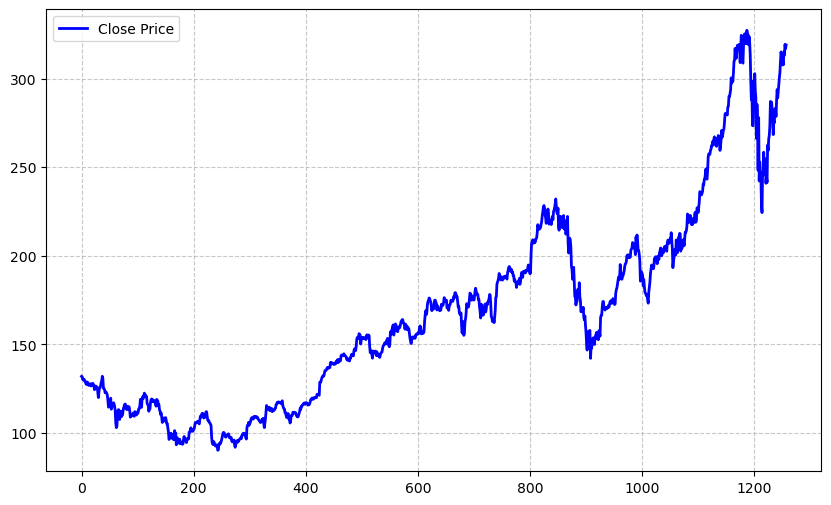

In [10]:
df1 = df.reset_index()['close']
plt.figure(figsize=(10, 6))
plt.plot(df1, label='Close Price', color='blue', linestyle='-', linewidth=2)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

LSTM are sensitive to the scale of the data, so we apply MinMax scaler.

In [11]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
print(df1)

[[0.17607447]
 [0.17495567]
 [0.16862282]
 ...
 [0.96635143]
 [0.9563033 ]
 [0.96491598]]


Splitting dataset into train and test split.

In [12]:
training_size = int(len(df1)*0.65) #100% * 0.65% = 65%
test_size = len(df1)-training_size #100% - 65% = 35%

In [13]:
training_size, test_size

(817, 441)

In [14]:
train_data, test_data = df1[0:training_size:], df1[training_size:len(df1):1]

In [15]:
print(train_data)

[[0.17607447]
 [0.17495567]
 [0.16862282]
 [0.1696994 ]
 [0.16727181]
 [0.16794731]
 [0.16473866]
 [0.16174111]
 [0.1581525 ]
 [0.15654817]
 [0.16271215]
 [0.1614878 ]
 [0.1554927 ]
 [0.15443722]
 [0.15730811]
 [0.15604154]
 [0.15849025]
 [0.15308621]
 [0.15735033]
 [0.15490163]
 [0.15946129]
 [0.15688592]
 [0.1537195 ]
 [0.14434687]
 [0.14812547]
 [0.15308621]
 [0.15241071]
 [0.15055307]
 [0.14924428]
 [0.13607194]
 [0.12551718]
 [0.13906949]
 [0.14911762]
 [0.14890653]
 [0.15401503]
 [0.16115005]
 [0.16583636]
 [0.17618002]
 [0.17060711]
 [0.14725998]
 [0.14700667]
 [0.14422021]
 [0.13691632]
 [0.13949168]
 [0.13784514]
 [0.13522756]
 [0.13071012]
 [0.11863548]
 [0.10259225]
 [0.1058009 ]
 [0.10466098]
 [0.10630752]
 [0.12403952]
 [0.09773706]
 [0.10512539]
 [0.10474542]
 [0.10816516]
 [0.11323144]
 [0.11044499]
 [0.10415435]
 [0.09419066]
 [0.06510175]
 [0.05395592]
 [0.0565735 ]
 [0.08169383]
 [0.09533058]
 [0.09689268]
 [0.09465507]
 [0.07337668]
 [0.09288187]
 [0.08456472]
 [0.07

In [16]:
print(test_data)

[[0.52651355]
 [0.52837119]
 [0.53119986]
 [0.53871485]
 [0.5461454 ]
 [0.55999324]
 [0.56864815]
 [0.57962509]
 [0.58270708]
 [0.57641645]
 [0.56049987]
 [0.55290045]
 [0.54036139]
 [0.5636663 ]
 [0.55192941]
 [0.57447437]
 [0.56362408]
 [0.53846154]
 [0.53998142]
 [0.54053027]
 [0.54753863]
 [0.53753272]
 [0.55074728]
 [0.55665794]
 [0.54918517]
 [0.56831039]
 [0.5716457 ]
 [0.57806299]
 [0.58659124]
 [0.59837035]
 [0.58114498]
 [0.56552394]
 [0.56332855]
 [0.57641645]
 [0.53204425]
 [0.52398041]
 [0.55632019]
 [0.53626615]
 [0.55648907]
 [0.55243604]
 [0.5306088 ]
 [0.54449886]
 [0.55015621]
 [0.55893777]
 [0.52668243]
 [0.54656759]
 [0.53179093]
 [0.51465   ]
 [0.51912522]
 [0.542599  ]
 [0.5567846 ]
 [0.49455374]
 [0.46968673]
 [0.47889048]
 [0.50498185]
 [0.49881787]
 [0.48184582]
 [0.43836021]
 [0.43016972]
 [0.40724479]
 [0.42670776]
 [0.43565819]
 [0.4032762 ]
 [0.3657857 ]
 [0.36494132]
 [0.34598497]
 [0.355822  ]
 [0.35421768]
 [0.38250443]
 [0.37663599]
 [0.37254074]
 [0.39

# 2. Data Pre-Processing

In [17]:
 def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset) - time_step-1):
		a = dataset[i : (i + time_step),0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [18]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [19]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [20]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0], X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] , 1)

In [21]:
X_train

array([[[0.17607447],
        [0.17495567],
        [0.16862282],
        ...,
        [0.09055982],
        [0.08388922],
        [0.09085536]],

       [[0.17495567],
        [0.16862282],
        [0.1696994 ],
        ...,
        [0.08388922],
        [0.09085536],
        [0.0873934 ]],

       [[0.16862282],
        [0.1696994 ],
        [0.16727181],
        ...,
        [0.09085536],
        [0.0873934 ],
        [0.09030651]],

       ...,

       [[0.34801148],
        [0.32930845],
        [0.32145571],
        ...,
        [0.50042219],
        [0.50413747],
        [0.5062062 ]],

       [[0.32930845],
        [0.32145571],
        [0.32694419],
        ...,
        [0.50413747],
        [0.5062062 ],
        [0.51920966]],

       [[0.32145571],
        [0.32694419],
        [0.32230009],
        ...,
        [0.5062062 ],
        [0.51920966],
        [0.53719497]]])

In [22]:
X_test

array([[[0.52651355],
        [0.52837119],
        [0.53119986],
        ...,
        [0.26154691],
        [0.25187875],
        [0.26483999]],

       [[0.52837119],
        [0.53119986],
        [0.53871485],
        ...,
        [0.25187875],
        [0.26483999],
        [0.27273495]],

       [[0.53119986],
        [0.53871485],
        [0.5461454 ],
        ...,
        [0.26483999],
        [0.27273495],
        [0.2766191 ]],

       ...,

       [[0.81875369],
        [0.84256523],
        [0.84210082],
        ...,
        [0.92544119],
        [0.91771511],
        [0.9483239 ]],

       [[0.84256523],
        [0.84210082],
        [0.84936249],
        ...,
        [0.91771511],
        [0.9483239 ],
        [0.94064004]],

       [[0.84210082],
        [0.84936249],
        [0.85835515],
        ...,
        [0.9483239 ],
        [0.94064004],
        [0.96635143]]])

# 3. Creating a Stacked LSTM Model

In [23]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 16s 546ms/step - loss: 0.0134 - val_loss: 0.0618
Epoch 2/100
12/12 [==============================] - 4s 344ms/step - loss: 0.0033 - val_loss: 0.0040
Epoch 3/100
12/12 [==============================] - 4s 332ms/step - loss: 9.9715e-04 - val_loss: 0.0081
Epoch 4/100
12/12 [==============================] - 4s 333ms/step - loss: 9.2331e-04 - val_loss: 0.0041
Epoch 5/100
12/12 [==============================] - 4s 338ms/step - loss: 7.4450e-04 - val_loss: 0.0077
Epoch 6/100
12/12 [==============================] - 4s 338ms/step - loss: 7.2682e-04 - val_loss: 0.0048
Epoch 7/100
12/12 [==============================] - 4s 339ms/step - loss: 6.0917e-04 - val_loss: 0.0041
Epoch 8/100
12/12 [==============================] - 4s 335ms/step - loss: 5.9385e-04 - val_loss: 0.0037
Epoch 9/100
12/12 [==============================] - 4s 336ms/step - loss: 5.7541e-04 - val_loss: 0.0038
Epoch 10/100
12/12 [==============================] - 4s 333ms

# 4. Predict the test data and plot the output

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
math.sqrt(mean_squared_error(y_train,train_predict))

In [ ]:
math.sqrt(mean_squared_error(ytest,test_predict))

In [ ]:
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict


plt.figure(figsize=(12, 6))
plt.grid(True)
plt.plot(scaler.inverse_transform(df1), label="Actual Data", color = 'pink')
plt.plot(trainPredictPlot, label="Training Predictions", color = 'red')
plt.plot(testPredictPlot, label="Test Predictions", color = 'blue')

plt.title("Actual vs. Predicted Data")
plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.legend()
plt.show()

In [ ]:
len(test_data)

In [ ]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

# 5. Predict the future and plot the output

In [ ]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
len(df1)

In [ ]:
actual_data = scaler.inverse_transform(df1[1158:])
predicted_data = scaler.inverse_transform(lst_output)

plt.figure(figsize=(12, 6))
plt.grid(True)
plt.plot(day_new, actual_data, label="Actual Data", color="blue")
plt.plot(day_pred, predicted_data, label="Predicted Data", linestyle="--", color="green")

plt.title("Actual vs. Predicted Data")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()


In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.figure(figsize=(12, 6))
plt.grid(True)
plt.plot(df3[1200:], label="Combined Data", color="blue")

plt.title("Combined Actual and Predicted Data")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()


In [ ]:
df3 = scaler.inverse_transform(df3).tolist()
plt.figure(figsize=(12, 6))
plt.grid(True)
plt.plot(df3, label="Transformed Data", color="blue")

plt.title("Inverse Transformed Data")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()
